2.	Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)
3.	Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.
a.	Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint)
b.	Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)
c.	Преобразовать категориальные данные в числовые, используя panadas.get_dummies.
d.	Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)
e.	Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)
f.	Проверить оценку модели.
g.	Сделать предсказание на случайных данных.
h.	Улучшить модель согласно примеров лекций 9-10 и материала лабораторной работы


<h1>Перекрестная проверка</h1>

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import mglearn

In [17]:
digits=load_digits()
logreg=LogisticRegression(max_iter=10000)

scores1=cross_val_score(logreg, digits.data, digits.target,cv=5)
print("Cross validation scores: {}".format(scores1))
print("Средняя правильность перекрестной модели: {}".format(scores1.mean()))

Cross validation scores: [0.925      0.875      0.93871866 0.93314763 0.89693593]
Средняя правильность перекрестной модели: 0.9137604456824512


In [18]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, digits.data, digits.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.95995551 0.97219132 0.9621802  0.95995551 0.96440489 0.95995551
 0.9621802  0.95773081 0.95550612 0.95550612]


<h1>Стратифицированная k-блочная перекрестная проверка</h1>

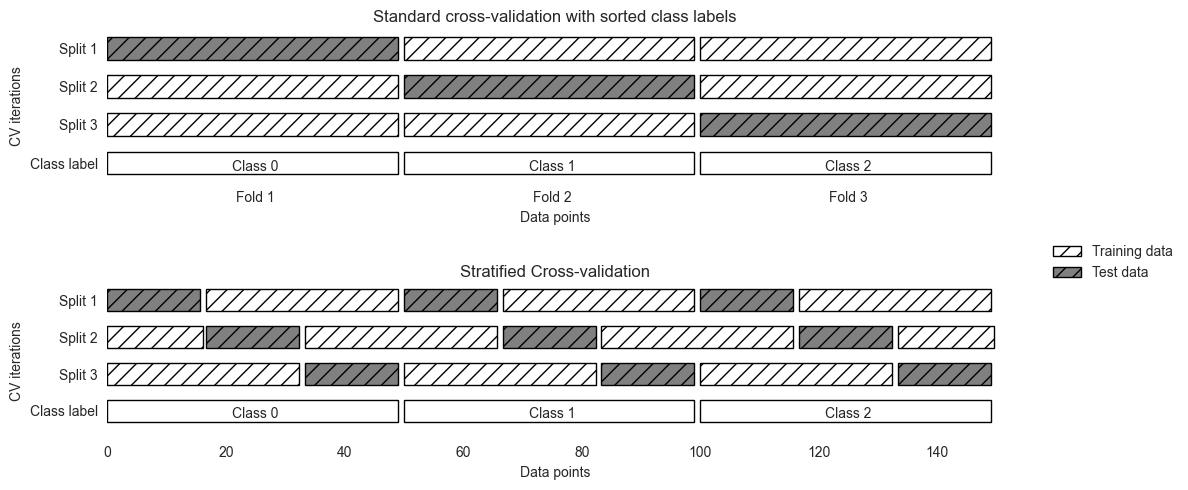

In [19]:
mglearn.plots.plot_stratified_cross_validation()

<h1>Решетчатый поиск</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC()
param_grid={'C':[0.1,1,10,100], 'gamma':[0.01,0.1,1,10], 'kernel': ['linear', 'rbf']}
grid_search=GridSearchCV(svm, param_grid,cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшая точность: ", grid_search.best_score_)

In [ ]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
display(results.head())from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе:", grid_search.score(X_test, y_test))

<h1>Решетчатый поиск с перекрестной проверкой</h1>

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
grid_search.fit(X_train, y_train)

print("Правильность на тестовом наборе:", grid_search.score(X_test, y_test))
print('Наилучшие значение параметров:', grid_search.best_params_)
print('Наилучшее значение кросс валид. правильности:', grid_search.best_score_)
print('Наилучшая модель:', grid_search.best_estimator_)

Правильность на тестовом наборе: 0.9711111111111111
Наилучшие значение параметров: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Наилучшее значение кросс валид. правильности: 0.9814484372848685
Наилучшая модель: SVC(C=0.1, gamma=0.01, kernel='linear')


<h1>Метрики модели</h1>

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-score: {}".format(f1))

Accuracy: 0.9861111111111112
Precision: 0.9861882716049383
Recall: 0.9861111111111112
F1-score: 0.9861071324368055


In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
